In [15]:
Data Neuralgia;
      input tratamiento $ sexo $ edad duracion dolor $ @@;
      datalines;
   P  F  68   1  No   B  M  74  16  No  P  F  67  30  No
   P  M  66  26  Yes  B  F  67  28  No  B  F  77  16  No
   A  F  71  12  No   B  F  72  50  No  B  F  76   9  Yes
   A  M  71  17  Yes  A  F  63  27  No  A  F  69  18  Yes
   B  F  66  12  No   A  M  62  42  No  P  F  64   1  Yes
   A  F  64  17  No   P  M  74   4  No  A  F  72  25  No
   P  M  70   1  Yes  B  M  66  19  No  B  M  59  29  No
   A  F  64  30  No   A  M  70  28  No  A  M  69   1  No
   B  F  78   1  No   P  M  83   1  Yes B  F  69  42  No
   B  M  75  30  Yes  P  M  77  29  Yes P  F  79  20  Yes
   A  M  70  12  No   A  F  69  12  No  B  F  65  14  No
   B  M  70   1  No   B  M  67  23  No  A  M  76  25  Yes
   P  M  78  12  Yes  B  M  77   1  Yes B  F  69  24  No
   P  M  66   4  Yes  P  F  65  29  No  P  M  60  26  Yes
   A  M  78  15  Yes  B  M  75  21  Yes A  F  67  11  No
   P  F  72  27  No   P  F  70  13  Yes A  M  75   6  Yes
   B  F  65   7  No   P  F  68  27  Yes P  M  68  11  Yes
   P  M  67  17  Yes  B  M  70  22  No  A  M  65  15  No
   P  F  67   1  Yes  A  M  67  10  No  P  F  72  11  Yes
   A  F  74   1  No   B  M  80  21  Yes A  F  69   3  No
   ;
proc print data=Neuralgia(obs=5);
run;   

Obs,tratamiento,sexo,edad,duracion,dolor
1,P,F,68,1,No
2,B,M,74,16,No
3,P,F,67,30,No
4,P,M,66,26,Yes
5,B,F,67,28,No


### Modelo de Independencia
Vamos a implementar un modelo logístico y consideramos a la variable de respuesta el dolor y a las covariables el sexo, 
la edad, la duración, el tratamiento. En el modelo de independencia consideramos que no existe interacción entre las variables explicativas.
##### Implementación 
Consideremos  una variable de respuesta $y$ (binaria u ordinal), y la variable $x_1$ $x_2$ variables explicativas entonces la sintaxis básica para la regresión logística en SAS es:
$$
\textbf{proc logistic;}\\
  \textbf{model y=x1 x2;}\\
\textbf{run;}
$$

In [20]:
proc logistic noprint ;
      model dolor= duracion edad;
run;

In [23]:
*Si queremos usar variables categoricas debemos usar la sentencia class nombreVarcategorica para crear variables de diseño;
proc logistic data=Neuralgia;
      class tratamiento sexo;
      model dolor= tratamiento sexo edad duracion / expb;
   run;

### Pero, ¿qué carajos significan las salidas?

### Ajuste del modelo

Para la $j-$esima observación sea $\hat{\pi}_j$ la probabilidad estimada de la respuesta observada. Existen 3 salidas en sas de criterios para el ajuste del modelo.
1. –2 Log Likelihood:
$$
-2\log L=-2\sum_j \dfrac{w_j}{\sigma^2} f_j\log(\hat{\pi}_j)
$$
donde las $w_j$,$f_j$  son los pesos y las frecuencias de la $j-$esima observación y $\sigma^2$ es un parametro de dispersión que por default es igual a 1(excepto cuando no).
2. Criterio de Información de Akaike
$$
AIC=-2\log L+2p
$$
donde $p$ es el numero de parametros en el modelo y $p=k+s$, k es el numero de niveles de respuesta menos 1 y s es el numero de efectos de las variables explicativas.
3. Schwarz (Bayesian Information) 
$$
SC=-2\log L+p\log(\sum_i f_i)
$$
donde $p_i$ es el numero de parametros del modelo.



In [24]:
proc logistic data=Neuralgia;
      class tratamiento sexo;
      model dolor= tratamiento sexo tratamiento*sexo  edad duracion / expb;
   run;

In [27]:
proc logistic data=Neuralgia;
      class tratamiento sexo;
      model dolor= tratamiento sexo edad*duracion*sexo edad duracion / expb;
   run;


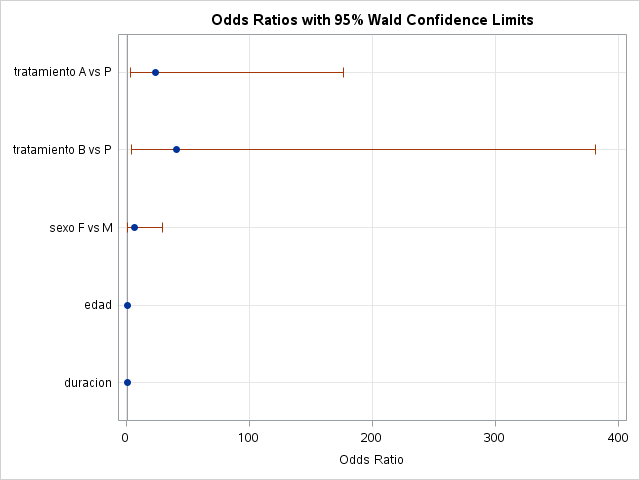
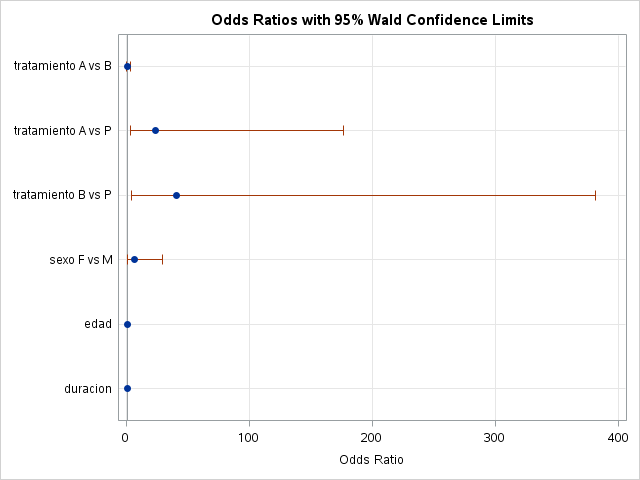

In [28]:
proc logistic data=Neuralgia;
      class tratamiento sexo /param=ref;
      model dolor= tratamiento sexo edad duracion;
      oddsratio tratamiento;
      oddsratio sexo;
      oddsratio edad;
  oddsratio duracion;
      contrast 'Pairwise' tratamiento 1  0,
                          tratamiento 0  1,
                          tratamiento 1 -1 
sexo 1 / estimate=exp;
   run;